# SyriaTel Customer Churn project 

## Overview

* In this project, we shall be modelling a classification problem.<br>
* Classification algorithms try to find the decision boundary using the predictors, which divides the target into different  classes which we shall see very soon.


## Business Problem
**SyriaTel Telephone Company** has been having a high churn rate with their customers which has affected the profitability of their services and the growth rate of their customer base negatively so they want to understand why this is happening and what they could do about it.In addition, they are also interested in reducing how much money is lost because of customers who don't stick around very long.  


## Data Understanding
The dataset used in this analysis contains information of customers of SyriaTel Company and it is also found in Kaggle.Our dataset includes the following information:<br>
* **state** - the state the user lives in
* **account length** - the number of days the user has this account
* **area code** - the code of the area the user lives in
* **phone number** - the phone number of the user
* **international plan** - whether the user has an international plan
* **voice mail plan** - whether the user has an voice mail plan
* **number vmail messages** - the number of voice mail messages the user has sent
* **total day minutes** - total number of minutes the user has been in calls during the day
* **total day calls** - total number of calls the user has done during the day
* **total day charge** - total amount of money the user was charged by the Telecom company for calls during the day
* **total eve minutes** - total number of minutes the user has been in calls during the evening
* **total eve calls** - total number of calls the user has done during the evening
* **total eve charge** - total amount of money the user was charged by the Telecom company for calls during the evening
* **total night minutes** - total number of minutes the user has been in calls during the night
* **total night calls** - total number of calls the user has done during the night
* **total night charge** - total amount of money the user was charged by the Telecom company for calls during the night
* **total intl minutes** - total number of minutes the user has been in international calls
* **total intl calls** - total number of international calls the user has done
* **total intl charge** - total amount of money the user was charged by the Telecom company for international calls
* **customer service calls** - number of customer service calls the user has done
* **churn** - true if the user terminated the contract, otherwise false

### Loading data

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import plot_confusion_matrix,accuracy_score, recall_score, precision_score, f1_score,roc_auc_score,roc_curve
from sklearn.feature_selection import RFE, RFECV
from imblearn.over_sampling import SMOTE
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("data/SyriaTel Customers.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#getting familiar with our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

There are 21 columns,none has of them has null values and there is a mix of all data types across the different columns.


In [5]:
data["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [6]:
data["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [7]:
data["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Data wrangling

***Dealing with duplicates***

In [8]:
#checking for duplicates
data.duplicated().value_counts()

False    3333
dtype: int64

Our data doesn't have duplicates.

***Handling missing values***

In [9]:
#checking for null values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As earlier noted,we have confirmed that the data has no missing values


***Checking for outliers***

In [10]:
columns=['account length','number vmail messages','total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
len(columns)

15

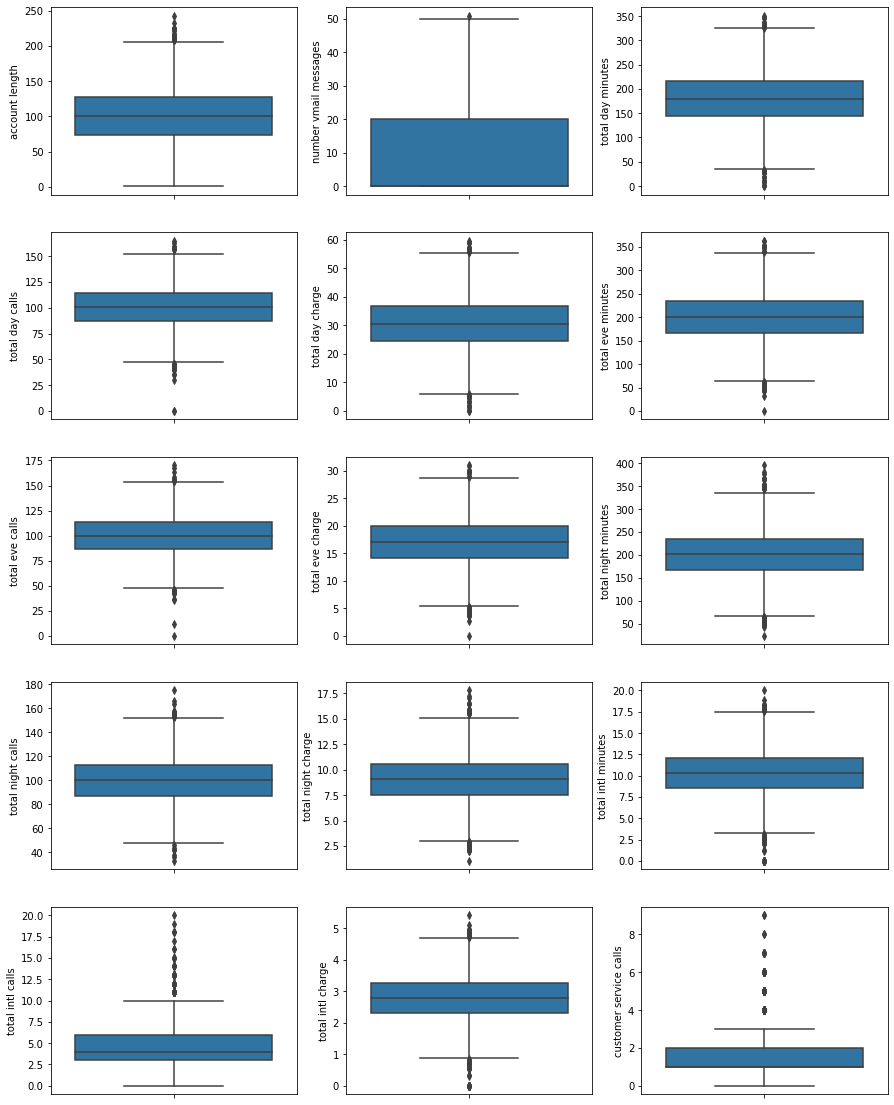

In [11]:
fig,ax=plt.subplots(ncols=3,nrows=5,figsize=(15,20))
index=0
ax=ax.flatten()
for col in data[columns]:
    sns.boxplot(y=col,data=data,ax=ax[index])
    index+=1

In [12]:
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Looks like there are columns with outliers and will have to remove them since machine learning models are sensitive to outliers

In [13]:
#Removing outliers through IQR METHOD
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[columns] < (Q1 - 1.5 * IQR)) |(data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]  
data.describe()     

    

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000
mean,100.416904,437.417974,8.124822,179.991583,100.534950,30.599112,201.214836,100.038516,17.103488,201.150678,100.036377,9.051830,10.308631,4.312411,2.783848,1.304565
std,39.296506,42.527388,13.707670,52.740915,19.310682,8.965888,49.205886,19.224863,4.182556,48.833880,19.059797,2.197581,2.598826,2.073939,0.701609,0.975238
min,1.000000,408.000000,0.000000,35.100000,47.000000,5.970000,64.300000,48.000000,5.470000,65.700000,48.000000,2.960000,3.300000,1.000000,0.890000,0.000000
25%,73.000000,408.000000,0.000000,144.000000,87.000000,24.480000,167.200000,87.000000,14.210000,167.575000,87.000000,7.540000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,179.750000,101.000000,30.560000,201.350000,100.000000,17.115000,201.050000,101.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.125000,114.000000,36.742500,235.150000,113.000000,19.985000,235.850000,113.000000,10.612500,12.100000,6.000000,3.270000,2.000000
max,205.000000,510.000000,50.000000,324.700000,152.000000,55.200000,337.100000,154.000000,28.650000,334.700000,152.000000,15.060000,17.300000,10.000000,4.670000,3.000000


***Data type conversion***

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2804 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2804 non-null   object 
 1   account length          2804 non-null   int64  
 2   area code               2804 non-null   int64  
 3   phone number            2804 non-null   object 
 4   international plan      2804 non-null   object 
 5   voice mail plan         2804 non-null   object 
 6   number vmail messages   2804 non-null   int64  
 7   total day minutes       2804 non-null   float64
 8   total day calls         2804 non-null   int64  
 9   total day charge        2804 non-null   float64
 10  total eve minutes       2804 non-null   float64
 11  total eve calls         2804 non-null   int64  
 12  total eve charge        2804 non-null   float64
 13  total night minutes     2804 non-null   float64
 14  total night calls       2804 non-null   

In [15]:
data["phone number"]

0       382-4657
1       371-7191
2       358-1921
4       330-6626
5       391-8027
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 2804, dtype: object

In [16]:
#Removing the'-' from the phone number column
data["phone number"]=data["phone number"].replace('-','', regex=True)
data["phone number"]

0       3824657
1       3717191
2       3581921
4       3306626
5       3918027
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 2804, dtype: object

In [17]:
#Changing the data type to interger
data["phone number"]=data["phone number"].astype("int64")
data["phone number"]

0       3824657
1       3717191
2       3581921
4       3306626
5       3918027
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 2804, dtype: int64

### Data exploration
For better understanding of our data will explore patterns and trends.<br>
**_1.Customer Churn rate_**

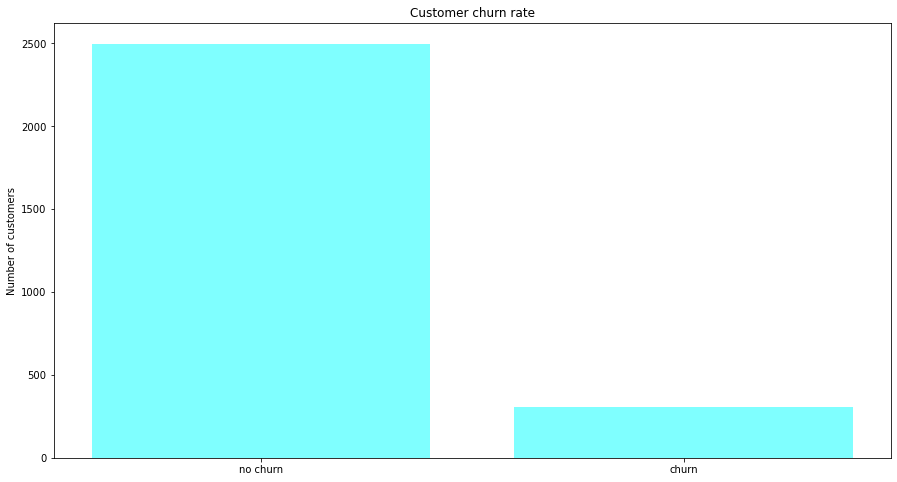

In [18]:
churn_dict = {0: "no churn", 1: "churn"}
y=data["churn"].value_counts()
fig,ax=plt.subplots(figsize=(15,8))
ax.bar([churn_dict[x] for x in y.index], height=y.values,color="cyan",alpha=0.5)
ax.set_title("Customer churn rate")
ax.set_ylabel("Number of customers")
plt.savefig("Customer churn rate1.png")


In [19]:
data["churn"].value_counts(normalize=True)

False    0.891227
True     0.108773
Name: churn, dtype: float64

Only around 10% churn out of the telecommunication company.So next will check where these people who churn where they are from<br>

**2._States with their churn rate_**

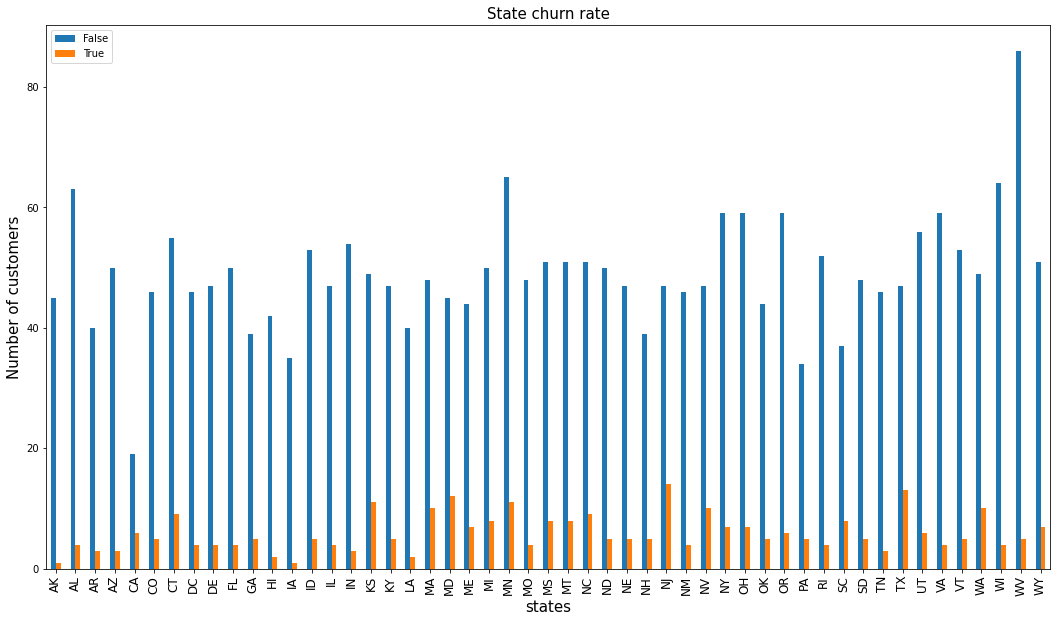

In [20]:
state_df=data.groupby(["state", "churn"]).size().unstack()
ax = state_df.plot(kind = 'bar', stacked = False, figsize=(18, 10))

#ax.bar(x=state_df.index,height=state_df[0],label="no churn")
#ax.bar(x=state_df.index,height=state_df[1],label="churn")
ax.set_title("State churn rate",fontsize=15)
ax.set_ylabel("Number of customers",fontsize=15)
ax.set_xlabel("states",fontsize=15)
plt.xticks(fontsize=12)
ax.legend()
plt.savefig("State churn rate2.png")   

From the above barplot,states ```New Jersey```,```Texas```,```Maryland```,```Kansas```,```Minnesota```,```Washtington```,```Michigan```,```Connecticut```,```Massachusets``` have the highest churn rates while customers in ```West Virginia``` and ```Alabama``` had the highest customer retention rates.

**_3. Does calls to customer service affect churning?_** 

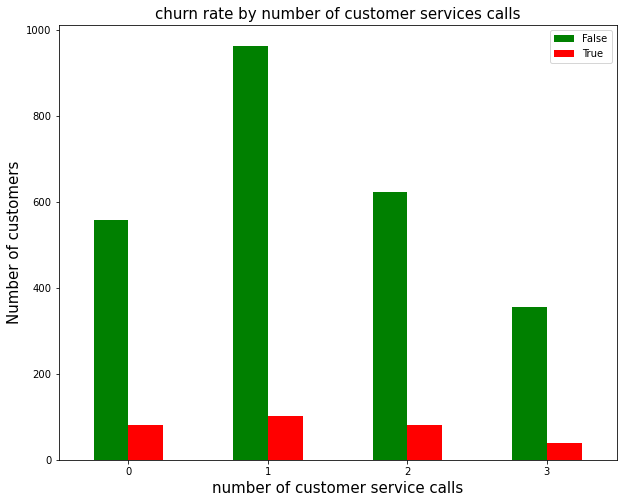

In [21]:
care_df=data.groupby(["customer service calls", "churn"]).size().unstack()
ax = care_df.plot(kind = 'bar', stacked = False, color = ['green','red'], figsize=(10, 8))

ax.set_title("churn rate by number of customer services calls",fontsize=15)
ax.set_ylabel("Number of customers",fontsize=15)
ax.set_xlabel("number of customer service calls",fontsize=15)
plt.xticks(rotation=360)
ax.legend()
plt.savefig("churn rate by number of customer services calls3.png")

Generally, customers with most calls to customer care are less likely to churn but there is quite an interesting trend as customers with 1 call to customer service are more likely to churn and also most customers who don't churn have one call also.

**_4.Does having a international plan affect churn rate?_**

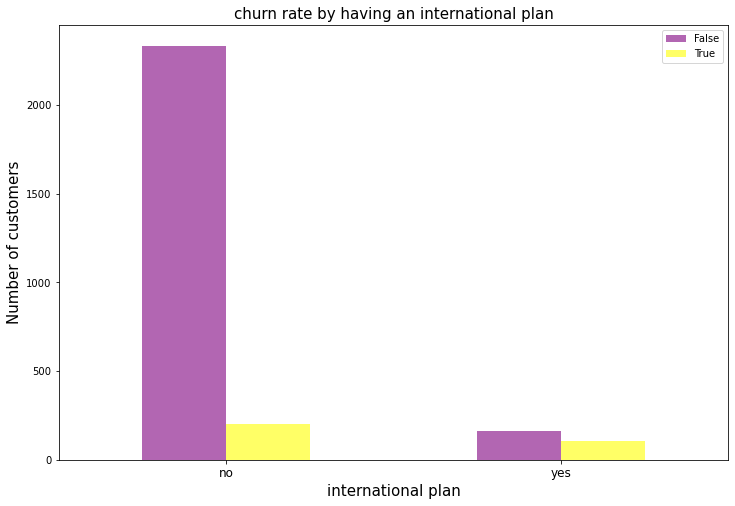

In [22]:
plan_df=data.groupby(["international plan", "churn"]).size().unstack()
ax = plan_df.plot(kind = 'bar', stacked = False, figsize=(12, 8),color=["purple","yellow"],alpha=0.6)
ax.set_title("churn rate by having an international plan",fontsize=15)
ax.set_ylabel("Number of customers",fontsize=15)
ax.set_xlabel("international plan",fontsize=15)
plt.xticks(rotation=360,fontsize=12)
ax.legend()
plt.savefig("churn rate by having an international plan4.png")

Customers who don't have an international plan are the ones who are more likely to churn.<br>

**_5.Does having a voice mail plan affect churn rate?_**

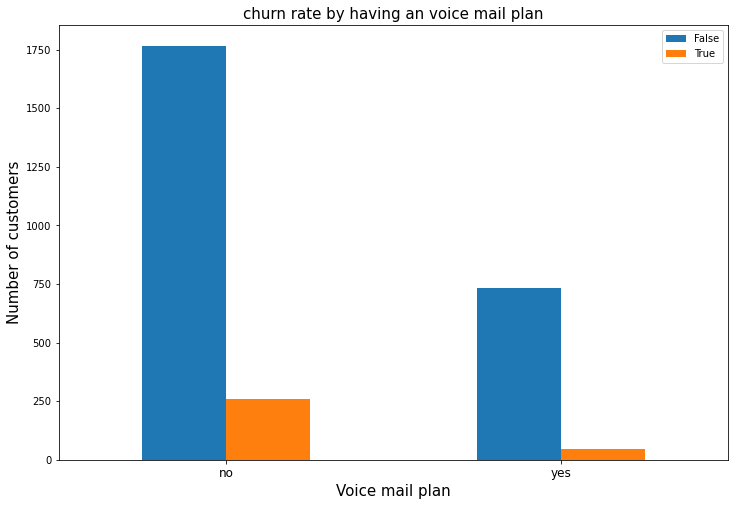

In [23]:
voice_df=data.groupby(["voice mail plan", "churn"]).size().unstack()
ax = voice_df.plot(kind = 'bar', stacked = False, figsize=(12, 8))
ax.set_title("churn rate by having an voice mail plan",fontsize=15)
ax.set_ylabel("Number of customers",fontsize=15)
ax.set_xlabel("Voice mail plan",fontsize=15)
plt.xticks(rotation=360,fontsize=12)
ax.legend()
plt.savefig("churn rate by having an voice mail plan5.png")

Customers who don't have a voice mail plan are the ones who are more likely to churn.<br>

**So from what we are seeing customers who don't have any plan for whatsoever are more likely to churn.**

### Preprocessing data

We are going to eliminate some columns since they are not really quite needed:<br>
1.*```phone number```* because its the unique identifier in our case therefore we really don't need it<br>
2.*```area code```* because its has the same information as state

In [24]:
data=data.drop(columns=["phone number","area code"])
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [25]:
data.shape

(2804, 19)

***One hot encoding***

In [26]:
data["state"].nunique()

51

There are 51 states to be one-hot encoded,if we just one hot encode all of them without a proper plan ,we might end up with a curse of dimensionality problem.Therefore the states will be grouped according to their region:<br>
* NorthCentral
* NorthEast
* West
* South

In [27]:
data["state"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MO', 'WV', 'RI', 'IA', 'MT', 'ID',
       'VT', 'VA', 'TX', 'FL', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'AZ',
       'GA', 'AK', 'MA', 'AR', 'WI', 'OR', 'MI', 'DE', 'IN', 'UT', 'CO',
       'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'MD', 'KY', 'LA',
       'ME', 'MS', 'NY', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [28]:

northc = '|'.join(['KS','OH','MN','SD','WI', 'MO','NE','MI','ND','IA', 'IL','IN'])
northe = '|'.join(['VT','ME', 'NJ','MA','NY','PA','CT','RI','NH'])
west = '|'.join(['CA', 'AK','WA','OR','NM','WY','NV','HI','MT','UT','ID','AZ','CO'])
south = '|'.join(['GA','VA','MS','TX','OK','FL','AR','TN','AL','SC','WV','DE','DC','MD','KY','LA','NC'])

data["state"]=data["state"].str.replace(northc,"northCentral")
data["state"]=data["state"].str.replace(northe,"northEast")
data["state"]=data["state"].str.replace(west,"west")
data["state"]=data["state"].str.replace(south,"south")

C:\Users\user\AppData\Local\Temp/ipykernel_13824/1644560026.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data["state"]=data["state"].str.replace(northc,"northCentral")
C:\Users\user\AppData\Local\Temp/ipykernel_13824/1644560026.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data["state"]=data["state"].str.replace(northe,"northEast")
C:\Users\user\AppData\Local\Temp/ipykernel_13824/1644560026.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data["state"]=data["state"].str.replace(west,"west")
C:\Users\user\AppData\Local\Temp/ipykernel_13824/1644560026.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data["state"]=data["state"].str.replace(south,"south")


In [29]:
data["state"].unique()

array(['northCentral', 'northEast', 'south', 'west'], dtype=object)

In [30]:
#Binary encoding
def binary(data,column):
    data[column]=data[column].map({"no" :0,"yes":1})
    return data[column]
binary(data,"international plan")
binary(data,"voice mail plan")

#One hot encode categorical data
dummies=pd.get_dummies(data["state"],prefix="state",drop_first=True)
data=data.drop("state",axis=1)
data=pd.concat([data,dummies],axis=1)
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state_northEast,state_south,state_west
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,118,9.18,6.3,6,1.70,0,False,0,1,0


In [31]:
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn',
       'state_northEast', 'state_south', 'state_west'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2804 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2804 non-null   int64  
 1   international plan      2804 non-null   int64  
 2   voice mail plan         2804 non-null   int64  
 3   number vmail messages   2804 non-null   int64  
 4   total day minutes       2804 non-null   float64
 5   total day calls         2804 non-null   int64  
 6   total day charge        2804 non-null   float64
 7   total eve minutes       2804 non-null   float64
 8   total eve calls         2804 non-null   int64  
 9   total eve charge        2804 non-null   float64
 10  total night minutes     2804 non-null   float64
 11  total night calls       2804 non-null   int64  
 12  total night charge      2804 non-null   float64
 13  total intl minutes      2804 non-null   float64
 14  total intl calls        2804 non-null   

***Scaling the data***

Let us have a look at the distribution of our data.

C:\Users\user\AppData\Local\Temp/ipykernel_13824/3815047817.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data[columns].hist(ax = ax)


array([[<AxesSubplot:title={'center':'account length'}>,
        <AxesSubplot:title={'center':'number vmail messages'}>,
        <AxesSubplot:title={'center':'total day minutes'}>,
        <AxesSubplot:title={'center':'total day calls'}>],
       [<AxesSubplot:title={'center':'total day charge'}>,
        <AxesSubplot:title={'center':'total eve minutes'}>,
        <AxesSubplot:title={'center':'total eve calls'}>,
        <AxesSubplot:title={'center':'total eve charge'}>],
       [<AxesSubplot:title={'center':'total night minutes'}>,
        <AxesSubplot:title={'center':'total night calls'}>,
        <AxesSubplot:title={'center':'total night charge'}>,
        <AxesSubplot:title={'center':'total intl minutes'}>],
       [<AxesSubplot:title={'center':'total intl calls'}>,
        <AxesSubplot:title={'center':'total intl charge'}>,
        <AxesSubplot:title={'center':'customer service calls'}>,
        <AxesSubplot:>]], dtype=object)

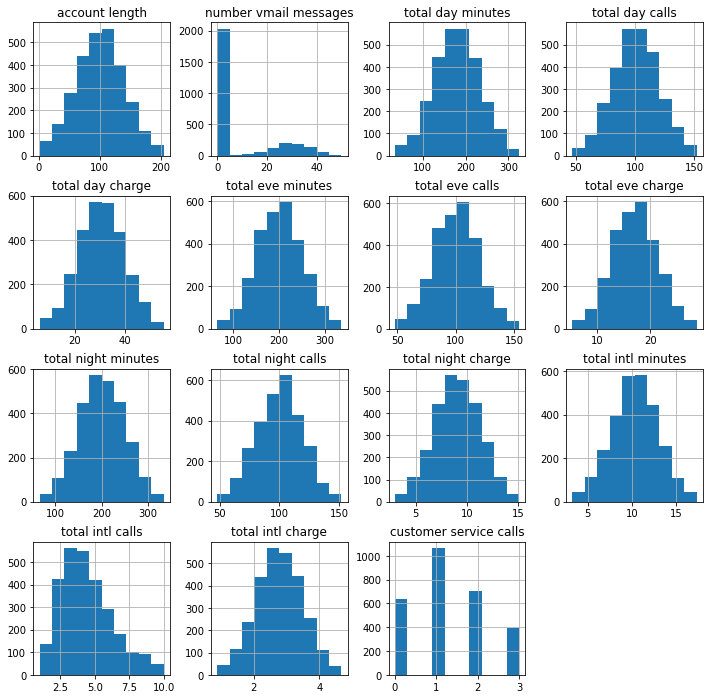

In [33]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data[columns].hist(ax = ax)

Most of the columns have a normal distibution except for a few like ```international calls``` which is skewed to the left

In [34]:
# partion features and target 
X = data.drop('churn', axis=1)
y = data['churn']


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# scale continuous features
scale = StandardScaler()
scale.fit(X_train[columns])
X_train_scaled = scale.transform(X_train[columns])
X_test_scaled = scale.transform(X_test[columns])



***Understanding the correlation***<br>

Its important to understand how each feature is correlated to the target.

In [35]:
correlation = data.corr()['churn'].sort_values()
correlation 


voice mail plan          -0.098812
number vmail messages    -0.086590
total intl calls         -0.058159
customer service calls   -0.017494
state_south              -0.009258
total eve calls          -0.005169
state_west               -0.004600
account length            0.012123
total night calls         0.017546
total day calls           0.020873
state_northEast           0.035813
total night charge        0.057309
total night minutes       0.057325
total intl minutes        0.077483
total intl charge         0.077522
total eve charge          0.139626
total eve minutes         0.139640
international plan        0.291600
total day charge          0.298124
total day minutes         0.298129
churn                     1.000000
Name: churn, dtype: float64

The ```voice mail plan``` is the most negatively correlated with  churning,meaning that if one doesn't have a voice mail plan they are more likely to churn as we saw earlier.<br>
As for ```total day minutes``` its the most positive correlated to churning, meaning that increase in minutes during the day the customer is likely to churn.

### Modelling

Will start to build our initial model which will set up the pace for all other models until the best model is achieved.<br>

***Logistic regression***

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


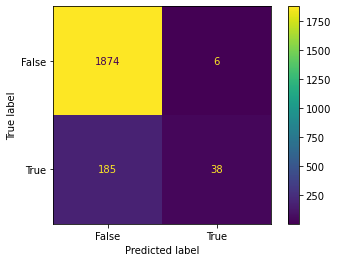

In [36]:
# Instantiate the model
logistic =LogisticRegression(random_state=42)

# Fit the model on the scaled data
logistic.fit(X_train_scaled, y_train)

plot_confusion_matrix(logistic, X_train_scaled, y_train);

Here we have the numbers of the :<br> * True negative - 1874<br>
                                  * True positive - 38<br>
                                  * False negative - 185<br>
                                  * False positive - 6

In [37]:
#Defining a function that calculates the log loss of our classifier
def evaluate(model,x_train,y_train):
    cv = cross_val_score(model, x_train, y_train,scoring="neg_log_loss")

    log_loss = -(cv.mean())
    print(f"Log loss for the classifier: {log_loss}")
evaluate(logistic, X_train_scaled, y_train)

Log loss for the classifier: 0.2804542069328191


Our loss metric is not doing bad but this is our initial model so its difficult to interpret this as per now but as we continue to improve our models the aim is to lower the loss metric.

In [38]:
#Defining a model that scores the model.
def score(model,x_train,y_train,x_test,y_test):
    train=model.score(x_train,y_train)
    test=model.score(x_test,y_test)
    
    print(f"Train score: {train} \n Test score :{test}")
    
score(logistic,X_train_scaled,y_train,X_test_scaled,y_test)



Train score: 0.9091773656680932 
 Test score :0.9087018544935807


From the look of things,the model is doing good as both the traing and test score are good.Inasmuch as the train score is better than test score this is not a sign of overfitting since the difference is not so much.


We can tune this model by solving the class imbalance problem  using the SMOTE method  which creates synthetic examples of the 
minority class therefore bringing a sense of balance.Then evaluate the metrics to see whether it is doing better than our initial model.


In [39]:
# Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
sm = SMOTE(random_state=42, sampling_strategy=0.28)
# Fit and transform X_t_scaled and y_t using sm
X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train_scaled, y_train)
        
# Clone the provided model and fit it on the train subset
temp_model = clone(logistic)
temp_model.fit(X_t_oversampled, y_t_oversampled)

LogisticRegression(random_state=42)

In [40]:
#checking our metrics
evaluate(temp_model, X_t_oversampled, y_t_oversampled)
score(temp_model,X_t_oversampled, y_t_oversampled,X_test_scaled,y_test)

Log loss for the classifier: 0.4359195200837281
Train score: 0.8416458852867831 
 Test score :0.9258202567760342


The log loss is doing worse than the previous model but the test score is impressive no over fitting at all.



***KNN Model***

For this next classifier,I use a *pipeline* to make the workflow organised and clean also the *GridSearchCV()* to look for the best combination of parameters.<br>

GridSearchCV is a great tool for finding the best combination of parameters. However, it is only as good as the parameters we put in our parameter grid  so we will need to be thoughful of what  values of k we put in our GridSearchCV as k can range as low as 1 and as high as whatever number.

In [41]:
#FINDING K WITH A LOSS OF LESS THAN 0.5
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=75):
    best_k = 0
    for k in range(min_k, max_k+1,2):
        knn1 = KNeighborsClassifier(n_neighbors=k)
        knn_log_loss1=-cross_val_score(knn1, X_train, y_train, scoring="neg_log_loss").mean()
        if  knn_log_loss1 < 0.5:
            best_k = k
             
    print("Best Value for k: {}".format(best_k))
    
    
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)  

Best Value for k: 75


In [42]:
#finding k with the best test score
def find_k(X_train, y_train, X_test, y_test, min_k=1, max_k=50):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test = knn.score(X_test,y_test)
        if test >best_score:
            best_k = k
            best_score = test
    
    print("Best Value for k: {}".format(best_k))
    print("Test Score: {}".format(best_score))
    
find_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 5
Test Score: 0.9144079885877318


In [43]:
#Building a pipeline
pipeline1=Pipeline([('KNN',  KNeighborsClassifier())])

grid = [{'KNN__n_neighbors': [5,50,75], 
         'KNN__metric': ["manhattan","euclidean","minkowski"]}]
                             
# Instantiate GridSearchCV    
gridsearch1 = GridSearchCV(estimator=pipeline1, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch1.fit(X_train_scaled, y_train)

# Print the test and train score
score(gridsearch1,X_train_scaled, y_train,X_test_scaled,y_test)

#print the log loss of the model
evaluate(gridsearch1, X_train_scaled, y_train)

Train score: 0.9243937232524965 
 Test score :0.9144079885877318
Log loss for the classifier: 1.4122818377604436


Our KNN model has so far the worst log loss but its a good fitting as the test and train scores are good.Probably ,for tuning this model we shall apply the SMOTE method as we did earlier to eliminate the class imbalance.

In [44]:
gridsearch1.best_params_

{'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}

The above combination of hyperparameters produced the optimal results for our KNN model

In [45]:
#Applying the SMOTE method
temp_model2 = clone(gridsearch1)
temp_model2.fit(X_t_oversampled, y_t_oversampled)
evaluate(temp_model2, X_t_oversampled, y_t_oversampled)
score(temp_model2,X_t_oversampled, y_t_oversampled,X_test_scaled,y_test)

Log loss for the classifier: 0.5840662617767699
Train score: 0.9310058187863675 
 Test score :0.8616262482168331


This balanced knn model is overfitted as the train score is doing much better than the test score<br>



***Decision Trees***

We have taken a look at Logistic and KNN models,let's jump to Decision Trees and see if it performs any better.

In [46]:
#Initiating a pipeline
pipeline2=Pipeline([('DT',  DecisionTreeClassifier(random_state=42))])

param_grid = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__max_depth': [None, 2, 3, 4, 5, 6],
    'DT__min_samples_split': [2, 5,8, 10],
    'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
gridsearch2 = GridSearchCV(pipeline2,param_grid, cv=5)

# Fit to the data
gridsearch2.fit(X_train, y_train)

# Print the test and train score
score(gridsearch2,X_train, y_train,X_test,y_test)

#print the log loss of the model
evaluate(gridsearch2, X_train, y_train)

Train score: 0.9624346172135045 
 Test score :0.9443651925820257
Log loss for the classifier: 0.43230908734743734


* So far our best performing model in terms of the test score.Although, the train score is performing better than the test maybe we are overfitting just a little bit but its not something to be that worried about as the difference is not that big.<br>
* Its also fair to note that the computational time for this model is fairly long.<br>
* As for the log loss ,the model is trying as its among the lowest together with the initial Logistic Regression

In [47]:
gridsearch2.best_params_

{'DT__criterion': 'gini',
 'DT__max_depth': 5,
 'DT__min_samples_leaf': 6,
 'DT__min_samples_split': 2}

The above combination of hyperparameters produced the optimal results for our DecisionTree model.


For a decision tree it is not a must to scale our data since its not a distance based model so lets just try with the scaled data to see if we get better results


In [48]:
# Fit to the data
gridsearch2.fit(X_train_scaled, y_train)

# Print the test and train score
score(gridsearch2,X_train_scaled, y_train,X_test_scaled,y_test)

#print the log loss of the model
evaluate(gridsearch2, X_train_scaled, y_train)

Train score: 0.9381835473133618 
 Test score :0.9229671897289586
Log loss for the classifier: 0.3295759606701541


Our scaled decision tree model is not doing bad,its fitting is okay and has a lower log loss that the unscaled DecisionTree

**_Feature importance_**

Decision Trees also compute the importance value for each feature.Lets take a look.

In [49]:
#Instantiating a decisionTree classifier with the optimal combination of parameters
decisionTree = DecisionTreeClassifier(random_state=42,criterion= 'gini',
 max_depth= 5,
min_samples_leaf= 6,
min_samples_split= 2)

decisionTree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=42)

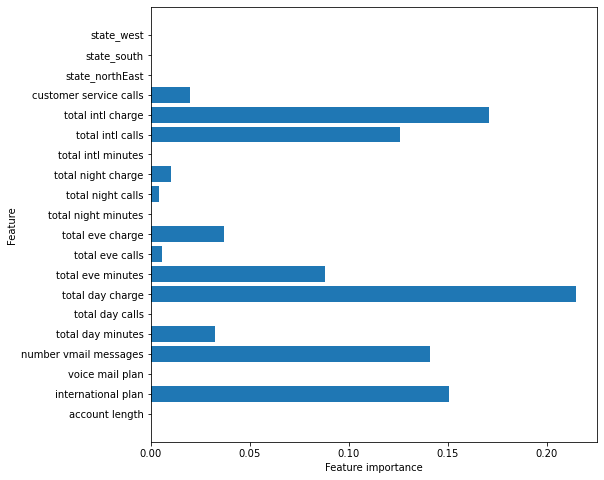

In [51]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decisionTree)
plt.savefig("Feature importance6.png")

* Our DecisionTree gives importance ```total day charge``` which has a positive correlation with the target feature this is followed by ```total intl charge``` which also positively correlated to churning this means that with increase of these two features there is increase in churning rate
* Also other important features are ```number of vmail messages``` and ```total intl calls``` which are negatively correlated to the target meaning decrease in these features  increases churn rate.

***Random forests***

A popular ensemble method is the Random Forest. Let's fit a random forest classifier next and see how it measures up compared to all the others.

In [52]:
#Instantiate a pipeline
pipeline3=Pipeline([('RF',   RandomForestClassifier())])

rf_param_grid = {
    'RF__n_estimators': [10, 30, 100],
    'RF__criterion': ['gini', 'entropy'],
    'RF__max_depth': [None, 2, 6, 10],
    'RF__min_samples_split': [5, 10],
    'RF__min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(pipeline3, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Print the test and train score
score(rf_grid_search,X_train, y_train,X_test,y_test)

#print the log loss of the model
evaluate(rf_grid_search, X_train, y_train)

Train score: 0.9728958630527818 
 Test score :0.9557774607703281
Log loss for the classifier: 0.24997287564237264


The log loss for this model is good.<BR>
This model is slightly overfitted as the train score is a bit better than the test score.

In [53]:
rf_grid_search.best_params_

{'RF__criterion': 'gini',
 'RF__max_depth': None,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 10,
 'RF__n_estimators': 30}

In [54]:
#Instantiating a rondomForest classifier with the optimal combination of parameters
randomForest=RandomForestClassifier(criterion= 'gini',
 max_depth= None,
 min_samples_leaf= 3,
min_samples_split= 5,
 n_estimators= 100)

randomForest.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=3, min_samples_split=5)

**_Feature importance_**

We will also check for feature importance just as we did in the Decision tree model.

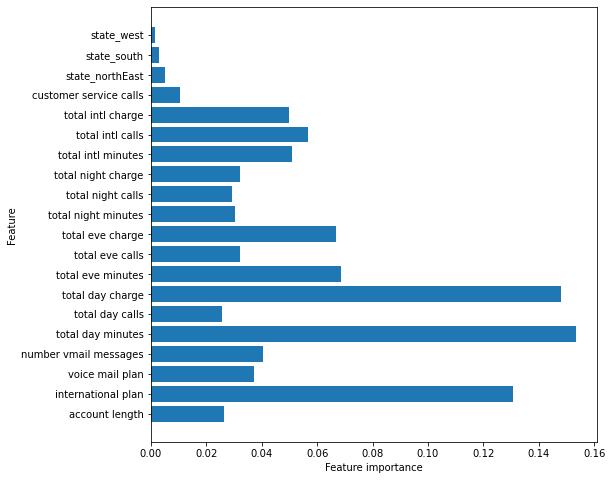

In [55]:
plot_feature_importances(randomForest)

The feature ```total day charge``` is the most important and it has a positive correlation with churning.Same goes for ```international plan``` and ```total day minutes``` they all have a relatively strong positive correlation with churn rate compared to the other features

### Model evaluation

* For the final model ,I will go with the Decision Tree model inasmuch as the Random Forest model is also performing well the slightly overfitting aspect is throwing it off.<br>
* The aim of this model is predicting so its very important for the final model to be able perform well for unseen data,the model must have that generalizing aspect.Therefore the smaller the difference between the train and test score,the better the model.



In [56]:
final_model=decisionTree

In [57]:
#Defining a function that evaluates our classifier metrics
def metrics(model):
    y_test_pred=model.predict(X_test)

    accuracy = accuracy_score(y_test,y_test_pred)
    recall = recall_score(y_test,y_test_pred)
    precision = precision_score(y_test,y_test_pred)
    f1 = f1_score(y_test,y_test_pred)

    print(f"Accuracy score:{accuracy},\n"
            f"Recall score: {recall},\n"
            f"Presicion score: {precision},\n"
            f"F1 score : {f1}")

print("Decision tree metrics\n")
metrics(decisionTree)
                   


Decision tree metrics

Accuracy score:0.9443651925820257,
Recall score: 0.6341463414634146,
Presicion score: 0.8524590163934426,
F1 score : 0.7272727272727272


_**Accuracy score**_
The accuracy score of our model is good.In other words, our model correctly identifies whether a customer churned or not about 94.4% of the time, whereas always guessing the majority class (not churned) would only be accurate about 89% of the time as we saw earlier.

**_Recall score_**
This represents the true positive rate.Given the label of a class is actually ```True``` ,there 63% chances that our model will correctly label it as ```True```and 37% it won't.<br>
For this particular case its very important for our model to correctly predict the ```True``` value which means that a customer churned because failure to which ,the company might think its doing well based on predicted low churn rate while actually the opposite is happening.

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


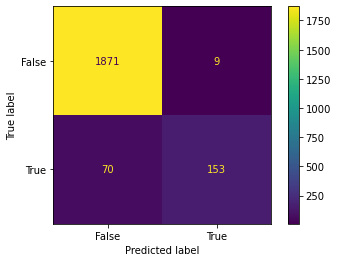

In [58]:
plot_confusion_matrix(decisionTree, X_train, y_train)

Above are the numbers for:
* True Negative - 1871
* False Positive - 9
* False Negative - 70
* True Positive - 153

### Conclusion

Different classifiers were fitted on the customer data, this was to predict whether a customer would churn or not.The final model(Decision Tree) was able to accurately predict churn by 94%.

One of the most predictors was ```total day charge``` followed by ```total intl charge``` and they both had a positive correlation with churn meaning that if a customer was charged at a high price during the day and international calls,they were likely to churn.

The other important predictors were ```number of vmail messages``` and ```total intl calls``` and they had a negative correlation with churn meaning that with decreased number of international calls and vmail messages a customer is likely to churn.Earlier we also saw that clients who neither have an international plan nor vmail plan were likely to churn .

In  ```New Jersey```,```Texas```,```Maryland```,```Kansas```,```Minnesota```,```Washtington```,```Michigan```,```Connecticut```,```Massachusets``` states we have the most people churning.


### Recommendation
* The company should look into the purchasing power of their clients and possibly lower prices for international calls and day calls.

* The company should pursuade their clients to have telephone plans(international plan,vmail plan) inturn this will encourage the customers to make more international calls or send more vmail messages

* Since the company has already known from which states where people who churn come from,it could possibly have advertistments aiming to lure the people in these states to use their services

* Lastly the company could have special offers for their loyal customer to encourage customer retention.

